<a href="https://colab.research.google.com/github/EmiKaczmarczyk/MET4OP/blob/master/PASO_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib==3.2.2

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")

In [5]:
#Eliminar esta celda una vez terminado el trabajo
df.head()

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO


### INTRODUCCIÓN

Este informe analizará los resultados de las elecciones PASO del 2019 correspondiente al desempeño de la fórmula presidencial del Frente de Todos en la Ciudad Autónoma de Buenos Aires.

In [6]:
#Dataframe con datos presidenciales
df_presidencial= df.loc[df.NOMBRE_CATEGORIA == "Presidente y Vicepresidente de la República"]

## Resultados totales

Nos da un primer panorama general de la posición de la fórmula en CABA.

- En primer lugar, podemos ver que está consolidado como segunda fuerza debido a la considerable diferencia respecto a Consenso Federal que obtiene el tercer lugar. Sin embargo, este tercer partido cuenta con un importante caudal de votos a  tener en cuenta ante la posibilidad de un ballotage. 
- La diferencia con Juntos por el Cambio es de más de 10 puntos, pero cabe destacar el hecho de que el Frente de Todos logró superar el 30% de los votos en uno de los distritos más difíciles para todos los partidos politicos y coaliciones ligadas al peronismo que se han presentado en la arena electoral porteña.
- Respecto a los partidos que quedaron fuera de competencia por no haber alcanzado el 1,5% de los votos, el caudal de votos que tienen no es demasiado relevante como para cambiar significativamente el desempeño del Frente de Todos. Además, no es probable que los votos de estos partidos migren al Frente de Todos debido a sus posiciones ideológicas. Movimiento al Socialismo tenía como fórmula Castañeira - Mulhall, figuras politicas que estan alineadas a la izquierda cuyos votos podrían ir hacia el FIT. La fórmula de Frente Patriota, Biondini-Venturino, tiene un candidato presidencial vinculado a la ultraderecha y nacionalista. El candidato de Movimiento de Acción Vecinal, Albarracín, ha expresado públicamente que comparte las ideas de Juntos por el Cambio en diferentes ocasiones. 

In [7]:
total=df_presidencial.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False).reset_index(drop=True)
total['Porcentaje'] = (total['VOTOS_AGRUPACION'] / total['VOTOS_AGRUPACION'].sum()) * 100
total

,NOMBRE_AGRUPACION,VOTOS_AGRUPACION,Porcentaje
0,JUNTOS POR EL CAMBIO,863169,44.252663
1,FRENTE DE TODOS,637891,32.703185
2,CONSENSO FEDERAL,168607,8.644088
3,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,75746,3.883321
4,UNITE POR LA LIBERTAD Y LA DIGNIDAD,68828,3.528651
5,BLANCO,62397,3.198949
6,FRENTE NOS,22592,1.158239
7,MOVIMIENTO AL SOCIALISMO,21470,1.100717
8,NULO,19116,0.980033
9,FRENTE PATRIOTA,5172,0.265156


### Visualización de resultado total

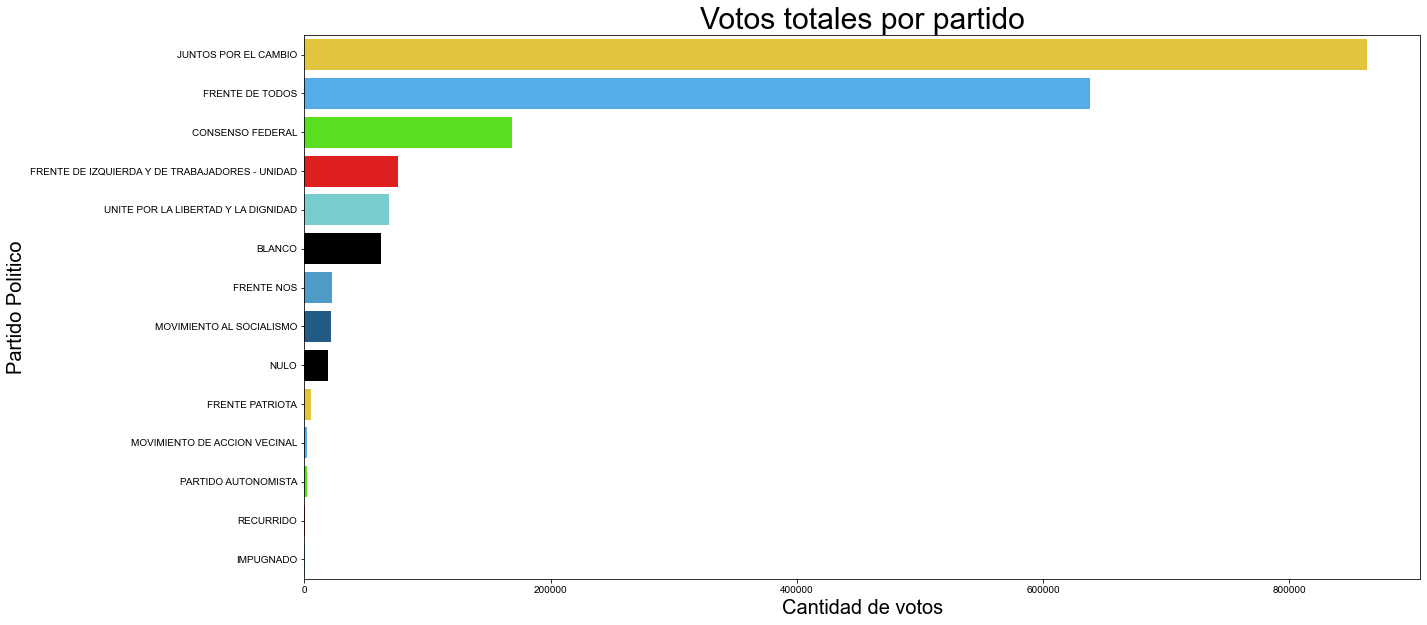

In [8]:
plt.figure(figsize=(20,10))
figura1=sns.barplot(data=total, y="NOMBRE_AGRUPACION", x="VOTOS_AGRUPACION", palette=["#FFD523","#3DB2FF","#49FF00", "red","#69DADB", "black","#39A2DB", "#125D98", "black"])
sns.set_style('darkgrid')
figura1.set_xlabel('Cantidad de votos',fontsize=20)
figura1.set_ylabel('Partido Politico',fontsize=20)
plt.title('Votos totales por partido',fontsize=30)
plt.show()

## Análisis por comuna

- Es pertinente profundizar el desempeño en cada comuna, para identificar aquellas en las que el FdT ganó, pero también para poder saber en cuál se debe intensificar el trabajo y pensar cuáles son las características de las diferentes comunas.  

In [10]:
#Agrupamos por comunas
df_comuna=df_presidencial.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Abreviamos algunos nombres por prolijidad.
cambio_nombres=df_comuna.replace({"FRENTE DE TODOS": "FdT",
                                           "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FIT",
                                           "JUNTOS POR EL CAMBIO": "JxC",
                                           "FRENTE NOS":"NOS",
                                          "UNITE POR LA LIBERTAD Y LA DIGNIDAD":"UNITE"})
comuna_final=pd.DataFrame(data=cambio_nombres) 
comuna_final

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FIT,4368
3,COMUNA 01,FdT,42299
4,COMUNA 01,NOS,1763
...,...,...,...
205,COMUNA 15,MOVIMIENTO DE ACCION VECINAL,159
206,COMUNA 15,NULO,1358
207,COMUNA 15,PARTIDO AUTONOMISTA,125
208,COMUNA 15,RECURRIDO,61


### Panorama general: resultado de todas las fuerzas políticas por comuna

<Figure size 1440x720 with 0 Axes>

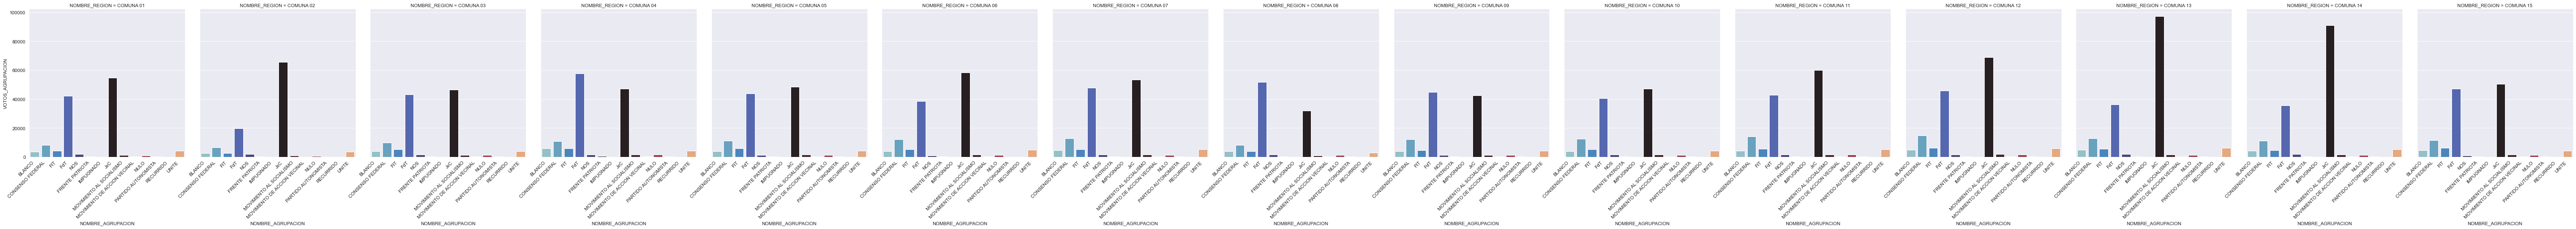

In [19]:
plt.figure(figsize=(20,10))
fig2=sns.catplot(x="NOMBRE_AGRUPACION", y="VOTOS_AGRUPACION", kind="bar", data=comuna_final, col="NOMBRE_REGION", palette="icefire")
fig2.set_xticklabels(comuna_final.NOMBRE_AGRUPACION, rotation=45, ha='right')

plt.show()

### En primer lugar, vemos el desempeño del Frente de Todos en términos absolutos. 
- El Frente de Todos tuvo un mejor resultado en las comunas de la zona sur: la comuna 4, 8, 7 y la 9. 
- El peor desempeño se sitúa en la comuna 2, correspondiente al barrio de Recoleta. Una situación similar ocurre con las comunas 13 y 14, ubicadas en la zona norte de la ciudad. Una característica en común que tienen estas comunas es el hecho de que son de las que tienen mayor poder adquisitivo de la Capital Federal. 
- En las demás comunas, los resultados absolutos son uniformes. 

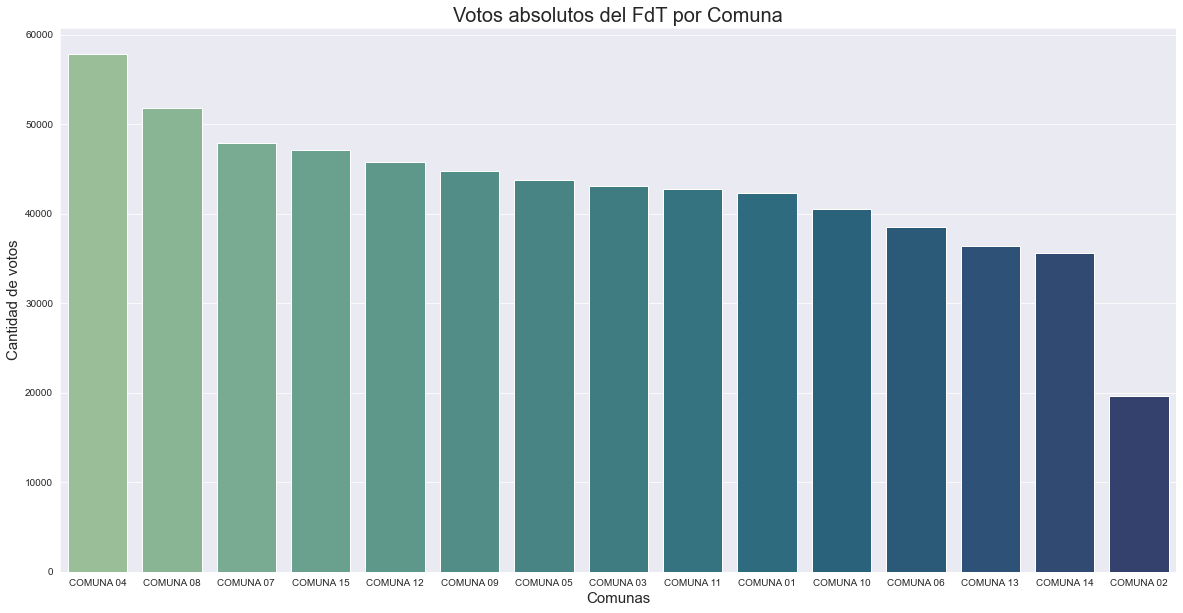

In [11]:
resultados_absolutos=comuna_final.loc[comuna_final.NOMBRE_AGRUPACION == "FdT"].sort_values(by="VOTOS_AGRUPACION", ascending=False)

#Grafico. 
plt.figure(figsize=(20,10))
figura2=sns.barplot(data=resultados_absolutos,x="NOMBRE_REGION", y="VOTOS_AGRUPACION", palette="crest")
figura2.set_xlabel('Comunas',fontsize=15)
figura2.set_ylabel('Cantidad de votos',fontsize=15)
plt.title('Votos absolutos del FdT por Comuna',fontsize=20)
plt.show()

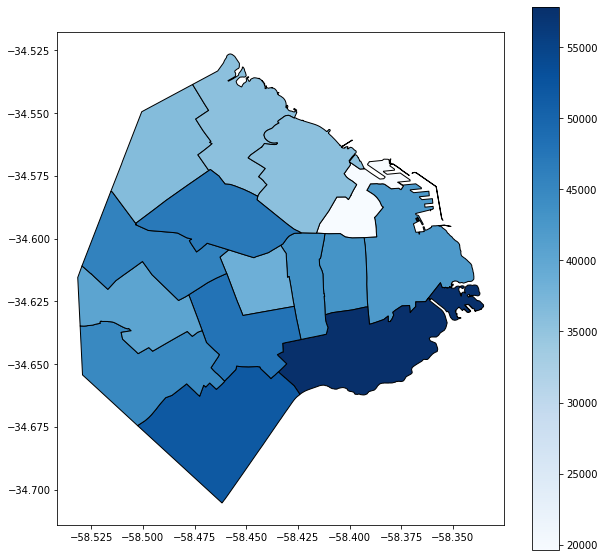

### Desempeño comparado con Consenso y JxC
- Retomando lo que se planteó en términos absolutos, en las comunas donde el Frente de Todos tuvo resultados desfavorables como en la 2, 13 y 14 la brecha con el primer partido es demasiado amplia como para pensar en revertir este resultado, o aunque sea achicar la diferencia. Se ve una tendencia muy marcada respecto a las preferencias que tienen las personas de estas zonas que se identifican con las propuestas de Juntos por el Cambio.


Por lo tanto, lo más adecuado sería concentrar los esfuerzos en las comunas donde la diferencia no es tan grande, debido a que hay mayores posibilidades de atraer votos y acercarse al primer partido, e idealmente dar vuelta el resultado.
Además, se debe intentar mantener los votos obtenidos en las comunas donde el Frente de Todos se quedó con la victoria.

En materia de discurso, proponemos ser más moderados en aquellas comunas donde los resultados fueron más parejos con Juntos por el Cambio, aprovechando la figura de Alberto Fernandez y diferenciándolo del discurso característico de la figura de Cristina Fernández de Kirchner. 

En caso de un posible ballotage, recomendamos la moderación del discurso y apelar a doctrinas peronistas tradicionales ya que podría captar los votos de Consenso Federal, partido que tuvo un desempeño bastante uniforme en todas las comunas y que está alineado al peronismo. 

In [12]:
temp=comuna_final.loc[(comuna_final.NOMBRE_AGRUPACION =="FdT") | (comuna_final.NOMBRE_AGRUPACION == "JxC") | (comuna_final.NOMBRE_AGRUPACION=="CONSENSO FEDERAL"),: ]
temp

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
1,COMUNA 01,CONSENSO FEDERAL,8305
3,COMUNA 01,FdT,42299
7,COMUNA 01,JxC,54568
15,COMUNA 02,CONSENSO FEDERAL,6604
17,COMUNA 02,FdT,19615
21,COMUNA 02,JxC,65519
29,COMUNA 03,CONSENSO FEDERAL,9685
31,COMUNA 03,FdT,43139
35,COMUNA 03,JxC,46502
43,COMUNA 04,CONSENSO FEDERAL,10671


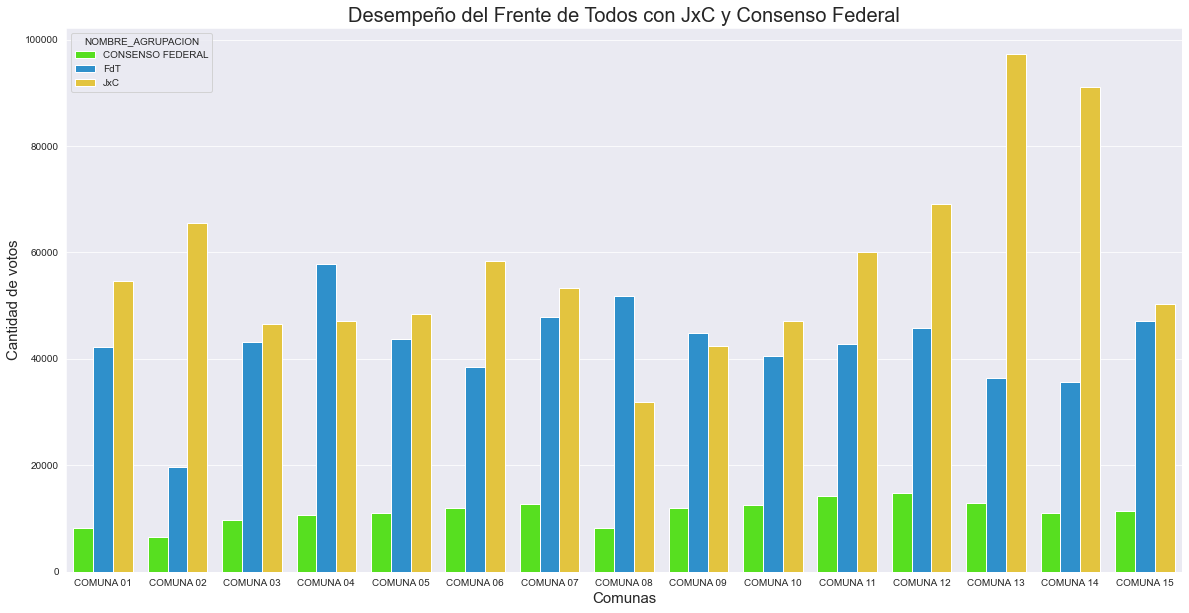

In [20]:
plt.figure(figsize=(20,10))
figura3=sns.barplot(data=temp, x="NOMBRE_REGION", y="VOTOS_AGRUPACION", hue="NOMBRE_AGRUPACION", palette=["#49FF00", "#1597E5", "#FFD523"])
figura3.set_xlabel('Comunas',fontsize=15)
figura3.set_ylabel('Cantidad de votos',fontsize=15)
plt.title('Desempeño del Frente de Todos con JxC y Consenso Federal',fontsize=20)
plt.show()